In [7]:
import os

digitization_path = '../data/digitization-dataset/digitization-dataset'
digitization_items = os.listdir(digitization_path)

In [8]:
len([x for x in digitization_items if x.endswith('6by2')])

500

In [ ]:
detection_path = '../data/detection-dataset/detection-dataset/images'
detection_items = os.listdir(detection_path)

In [9]:
len([x for x in detection_items if x.endswith('6by2.jpg')])

500

In [ ]:
overlap_path1 = '../data/overlap-dataset/without-overlap/image'
overlap_items1 = os.listdir(overlap_path1)

In [11]:
len([x for x in overlap_items1 if '6by2' in x])

0

In [ ]:
overlap_path2 = '../data/overlap-dataset/with-overlap/image'
overlap_items2 = os.listdir(overlap_path2)

In [13]:
len([x for x in overlap_items2 if '6by2' in x])

0

In [14]:
segmentation_path = '../data/segmentation-dataset/segmentation-dataset/image'
segmentation_items = os.listdir(segmentation_path)

In [15]:
len([x for x in segmentation_items if '6by2' in x])

6000

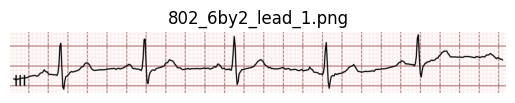

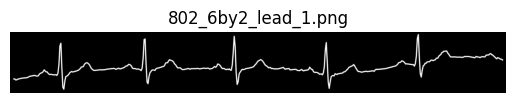

In [ ]:
import random
import cv2
from matplotlib import pyplot as plt


# Directory path
path = '../data/segmentation-dataset/segmentation-dataset/image'
images = [f for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.jpeg')) and '6by2' in f]

# Pick random images
sample = random.sample(images, 1) 

# Read and show
for img_name in sample:
    img = cv2.imread(os.path.join(path, img_name))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(img_name)
    plt.axis('off')
    plt.show()

# Directory path
path = '../data/segmentation-dataset/segmentation-dataset/mask-png'
images = [f for f in os.listdir(path) if f in sample]

# Pick random images
sample = images

# Read and show
for img_name in sample:
    img = cv2.imread(os.path.join(path, img_name))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(img_name)
    plt.axis('off')
    plt.show()